# Titanic (Metrowest Boston Developers Machine Learning Group)
This the intro to Kaggle "Titanic" dataset. Content here is taken in large part from
* https://www.kaggle.com/maf345/titanic-data-set-a-beginner-friendly-solution
* https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook
* https://www.kaggle.com/c/titanic/data

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# get the data
train_df = pd.read_csv('data/titanic/train.csv')
test_df = pd.read_csv('data/titanic/test.csv')
combine = [train_df, test_df]
foo = np.array([[2,3,4],[4,5,6]])

# Get familiar with the dataset


### Data Dictionary

|Attribute|Description|
|:------------|:------------|
|survival|Survival 0 = No, 1 = Yes|
|pclass|Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|
|Age|Age in years|
|sibsp|# of siblings / spouses aboard the Titanic parch # of parents / children aboard the Titanic|
|ticket|Ticket number|
|fare|Passenger fare|
|cabin|Cabin number|
|embarked|Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton|

Variable Notes:
* pclass: A proxy for socio-economic status (SES)
 * 1st = Upper
 * 2nd = Middle
 * 3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
 * Sibling = brother, sister, stepbrother, stepsister
 * Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
 * Parent = mother, father
 * Child = daughter, son, stepdaughter, stepson
 * Some children travelled only with a nanny, therefore parch=0 for them.

In [63]:
# show the first few training instances
train_df.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250


In [64]:
# show the first few test instances (no "Survived")
test_df.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875


In [65]:
# show the attribute types
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [66]:
# describe the numeric attributes
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
# describe the categorical attributes
train_df.describe(include=['O'])

ValueError: No objects to concatenate

In [ ]:
# check for nulls - this should not be a surprise
train_df.isnull().sum()

# Preliminary analyze by correlation...
### corr() only includes attributes that are numeric

In [19]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### "groupby" to investigate nominal attributes

In [20]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [21]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [22]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Now I am following:
https://www.kaggle.com/maf345/titanic-data-set-a-beginner-friendly-solution

* Exploratory Data Analysis by Visualization
* Data Cleaning
* converting Categorical Features
* Feature Selection
* Applying Logistic Regression 
* Kaggle Submission

In [24]:
train = train_df
test = test_df

# Exploratory Data Analysis by Visualization

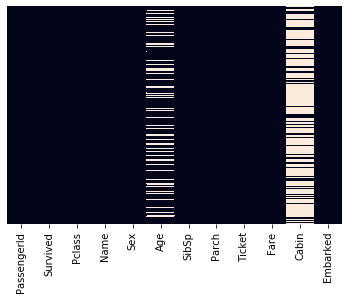

In [25]:
# Using seaborn's heatmap to explore the missing values:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [26]:
# -> Age and Cabin have a lot of missing values

In [27]:
train.isnull().sum()       #More easy way to count the number null values. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

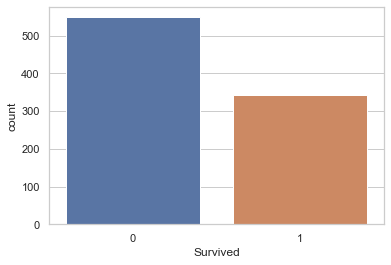

In [28]:
# Visualizing Number of passengers Survived or Not:

sns.set(style = 'whitegrid')
sns.countplot(x = 'Survived', data = train)

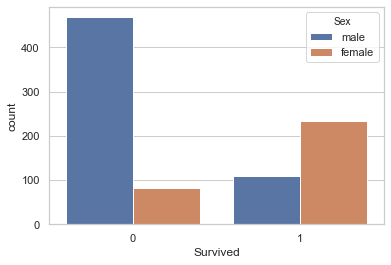

In [29]:
# Visualizing Number of passengers Survived or Not based on Sex:

sns.countplot(x = 'Survived', hue = 'Sex', data = train)

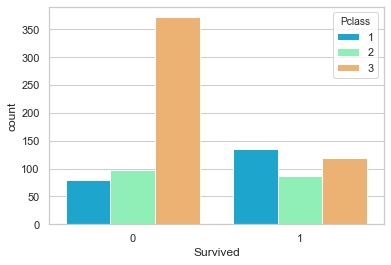

In [30]:
# Visualizing Number of passengers Survived or Not based on Passenger Class:

sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

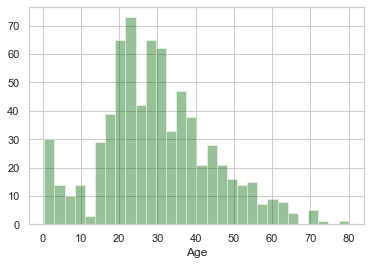

In [31]:
# Getting an idea about the age of passengers:

sns.distplot(train['Age'].dropna(), kde = False, color = 'darkgreen', bins = 30)   #setting kde false to view histogram.

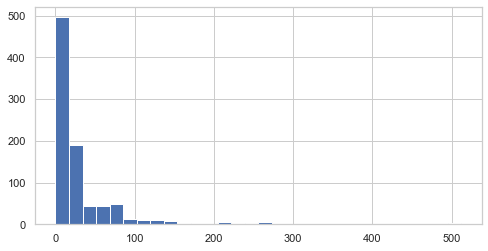

In [32]:
# Visualizing various price range of ticket: 

train['Fare'].hist(bins = 30, figsize = (8, 4))

# Data Cleaning

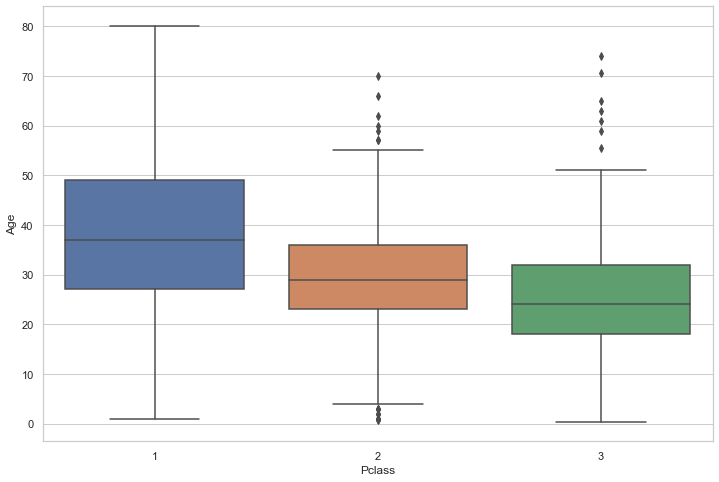

In [33]:
# We will fill the missing Age data with the mean age of passenger of each class
# Finding the mean age of each passenger class:

plt.figure(figsize = (12, 8))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [34]:
train[["Pclass", "Age"]].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [35]:
# Setting the Missing Age values with Mean Age on the basis of Passenger Class:

def mean_age_finder(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [36]:
# Updating the Age column with apply() method:

train['Age'] = train[['Age', 'Pclass']].apply(mean_age_finder, axis = 1)


In [37]:
# Verifying if there is any null value in Age column:

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
# Now we will replace the two null values of 'Embarked' column.
# We will replace NaN values with most frequent value of this column: (Port from where the particular passenger was embarked/boarded): 

most_frequent_embarked = train['Embarked'].value_counts().index[0]      #Output: 'S'
train['Embarked'].fillna(most_frequent_embarked, inplace = True)

In [39]:
# Verifying if there is null values in Embarked column. 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [40]:
# We see that Cabin column has a lot of null values. So we will drop it.
train.drop('Cabin', axis = 1, inplace = True)

In [41]:
# Verifying if there is any null values remains in our train data:

# sns.heatmap(train.isnull(), yticklabels = False, cbar = False)     #Way 1
train.isnull().sum()                                                 #Way 2 (I prefer this method)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# So our train data is now free from null values.
Do the same for test data

In [42]:
# Setting the Missing Age values with Mean Age on the basis of Passenger Class:

def mean_age_finder_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

In [43]:
# Updating the Age column using apply() method:

test['Age'] = test[['Age', 'Pclass']].apply(mean_age_finder_test, axis = 1)


In [44]:
#Replacing the missing value of 'Fare' column with mean value:

test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [45]:
# Dropping `Cabin` column from test data:

test.drop('Cabin', axis = 1, inplace = True)

In [46]:
# Verifying if there is any null value in test data:

test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# Converting Categorical Feature
We will convert the categorical features to dummy variables using pandas. Otherwise our Machine Learning algorithm will not be able to take them as inputs

In [49]:
# Setting drop_first = True is for preventing multicollinearity, as one column is opposite of another. 

sex = pd.get_dummies(train['Sex'], drop_first = True)
embarked = pd.get_dummies(train['Embarked'], drop_first = True)

In [50]:
# Removing Categorical Columns and added newly converted dummy columns:

train.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
train = pd.concat([train, sex, embarked], axis = 1)

In [51]:
# Viewing train data after dropping and adding columns:

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### do the same for test data...

In [52]:
# Creating dummy variables:

sex = pd.get_dummies(test['Sex'], drop_first = True)
embarked = pd.get_dummies(test['Embarked'], drop_first = True)

In [53]:
# Removing Categorical Columns and added newly converted dummy columns (test data):

test.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
test = pd.concat([test, sex, embarked], axis = 1)

In [54]:
# Viewing test data after dropping and adding columns:

test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


# Feature Selection

In [55]:
X_train = train.drop(['PassengerId', 'Survived'], axis = 1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1).copy()

In [56]:
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

# Applying Logistic Regression Mode

In [60]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver = 'liblinear')
logmodel.fit(X_train, y_train)

log_predictions = logmodel.predict(X_test)

In [61]:
accuracy = round(logmodel.score(X_train, y_train) * 100, 2)
print('Logistic Regression Accuracy: ', accuracy)

Logistic Regression Accuracy:  80.25


In [62]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053
Age,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.081658,0.015733
SibSp,-0.057527,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184
male,0.042939,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224
Q,-0.033606,0.003650,0.221009,-0.081658,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421
S,0.022204,-0.149683,0.074053,0.015733,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000


# First Submission File

In [142]:
Submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": log_predictions
})

Submission.to_csv('Submission.csv', index = False)

In [143]:
# Viewing the submission file: 

Submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Submit file to Kaggle

Go to the submission section of the Titanic competition. Drag your file from the directory which contains your code and make your submission.

Congratulations - you're on the leaderboard!**

# Further Improvement

## Decision Tree

In [144]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)

dtree_accuracy = round(dtree.score(X_train, y_train) * 100, 2)
print('Decision Tree Model Accuracy: ', dtree_accuracy)

Decision Tree Model Accuracy:  98.2


In [145]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [146]:
dtreeOut = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": dtree_predictions
})

dtreeOut.to_csv('dtree.csv', index = False)

# NEXT WEEK:
"Machine Learning" (Tom M. Mitchell)

https://www.amazon.com/Learning-McGraw-Hill-International-Editions-Computer/dp/0071154671/ref=sr_1_3?keywords=machine+learning+mitchell&qid=1566387805&s=gateway&sr=8-3

I will be reviewing "Decision Tree Learning" (Chapter 3)
